## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [1]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [2]:
from src.models.LDA import LDA, plot_topic_distribution, plot_coherence_scores
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings_full_text.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=5, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

Building LDA-models: 100%|██████████| 9/9 [00:30<00:00,  3.35s/it]


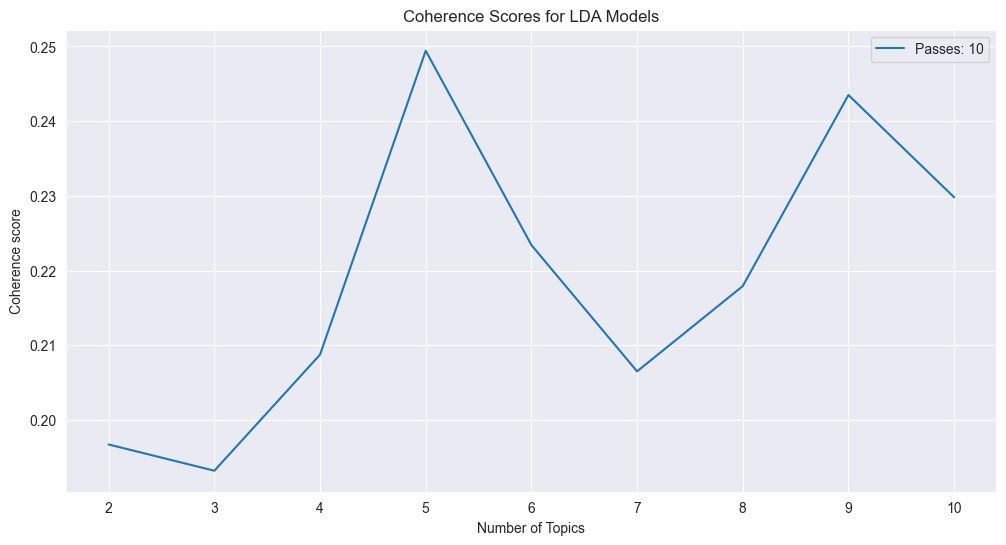

In [3]:
coherence_values, model_list, topic_range, passes = lda.calculate_lda_model_coherences(topic_interval=(2, 10), passes=10)

plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes)
#plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes, savefig='../../plots/LDA_coherence-Large')

### Select optimal model

In [4]:
best_model = model_list[coherence_values.index(max(coherence_values))]

### Print topics

In [5]:
topics = best_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.003*"nei" + 0.003*"vedlagt" + 0.003*"verden" + 0.003*"jo" + 0.003*"jord" + 0.003*"symbolpolitikk" + 0.003*"energimiks" + 0.002*"kina" + 0.002*"unødvendig" + 0.002*"samfunnsøkonomisk"')
(1, '0.002*"redusere" + 0.002*"derfor" + 0.002*"liten" + 0.002*"gi" + 0.002*"energi" + 0.002*"høy" + 0.002*"bruk" + 0.002*"bygge" + 0.002*"produksjon" + 0.002*"behov"')
(2, '0.004*"behov" + 0.004*"vår" + 0.003*"mulighet" + 0.003*"viktig" + 0.003*"høring" + 0.003*"derfor" + 0.003*"liten" + 0.003*"lavutslippssamfunn" + 0.003*"bruk" + 0.003*"forslag"')
(3, '0.004*"følge" + 0.003*"støtte" + 0.003*"anbefaling" + 0.003*"klima" + 0.003*"forslag" + 0.003*"nasjonal" + 0.003*"lavutslippssamfunn" + 0.003*"kommune" + 0.003*"samfunn" + 0.003*"arbeid"')
(4, '0.004*"følgende" + 0.004*"global" + 0.004*"liten" + 0.004*"vedtak" + 0.004*"samfunn" + 0.003*"punkt" + 0.003*"møte" + 0.003*"meir" + 0.003*"eu" + 0.003*"følge"')


### Calculate text-topic pairs

In [6]:
predictions = lda.predict_topics(model=best_model, relevancy=False)
dataframe['topic_predictions'] = predictions

dataframe.head(n=100)

,actor,text,date,actor_label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,Interessegruppe,"{'topic': 1, 'confidence': 0.64}"
1,Advokatforeningen,Advokatforeningens tillitsvalgte advokater utf...,28.02.2024,Interessegruppe,"{'topic': 3, 'confidence': 0.93}"
2,Agder fylkeskommune,Agder fylkeskommunes høringssvar til NOU 2023:...,27.02.2024,Offentlig forvaltning,"{'topic': 4, 'confidence': 0.95}"
3,Akademikerne,Akademikerne viser til brev av 31. oktober 202...,05.02.2024,Interessegruppe,"{'topic': 3, 'confidence': 0.67}"
4,Alliansen ny landbrukspolitikk,"Takk for det grundige arbeidet med utredning, ...",28.02.2024,Interessegruppe,"{'topic': 2, 'confidence': 0.99}"
...,...,...,...,...,...
95,NHO Logistikk og Transport - Ole A. Hagen (nær...,"Hei, Vedlagt kan dere finne vårt høringssvar. ...",28.02.2024,Interessegruppe,"{'topic': 2, 'confidence': 0.94}"
96,NHO Transport,"NHO Transport viser til vedlagte dokument, som...",28.02.2024,Interessegruppe,"{'topic': 2, 'confidence': 0.9}"
97,NIBIO,NIBIOs høringssvar av NOU 2023: 25 Omstilling ...,28.02.2024,Offentlig forvaltning,"{'topic': 3, 'confidence': 0.8}"
98,Norad,Høringsvar fra Norad er lagt ved som pdf.,28.02.2024,Interessegruppe,"{'topic': 0, 'confidence': 0.2}"


## Plot distributions

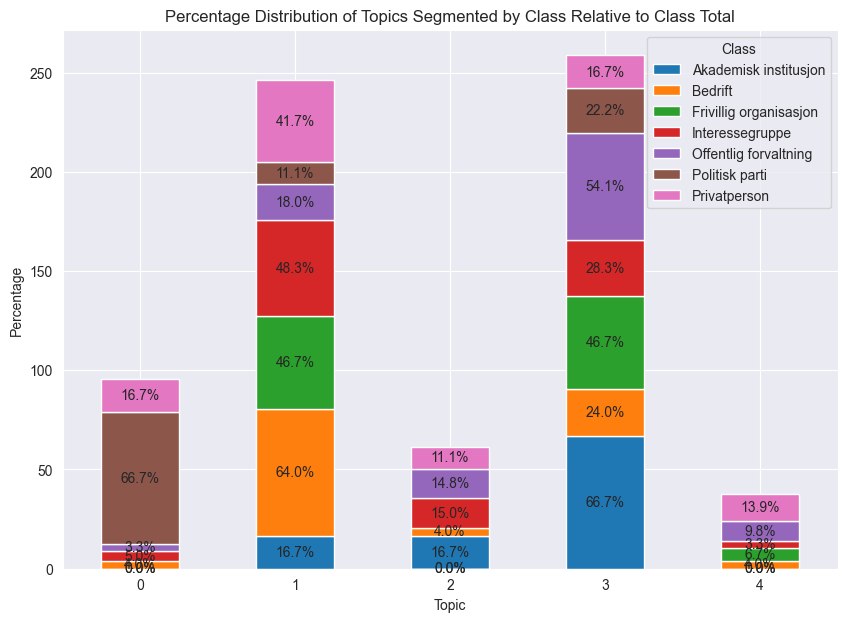

In [7]:
plot_topic_distribution(dataframe)

### Extract arguments

In [8]:
arguments_df = lda.extract_arguments(dataframe, best_model)
arguments_df.to_csv('../../datasets/LDA-Arguments')

Processing Documents:   0%|          | 0/212 [00:00<?, ?it/s]


KeyError: 'label'